In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

## Step 1: Generate Synthetic Dataset

In [2]:

def generate_twitter_data(num_users=50, num_messages=100, retweet_probability=0.3):
    users = [f"User_{i}" for i in range(1, num_users + 1)]

    # Create messages dataset
    messages = []
    for i in range(1, num_messages + 1):
        author = random.choice(users)
        content = f"Message_{i}"
        messages.append({"message_id": i, "author": author, "content": content})

    messages_df = pd.DataFrame(messages)

    # Create retweets dataset
    retweets = []
    for _, message in messages_df.iterrows():
        if random.random() < retweet_probability:
            retweet_count = random.randint(1, 5)  # Randomly determine how many retweets
            retweeters = random.sample(users, k=min(retweet_count, len(users)))
            for retweeter in retweeters:
                if retweeter != message["author"]:  # Ensure no self-retweets
                    retweets.append({
                        "original_message_id": message["message_id"],
                        "original_author": message["author"],
                        "retweeter": retweeter
                    })

    retweets_df = pd.DataFrame(retweets)

    return messages_df, retweets_df

# Generate the dataset
messages_df, retweets_df = generate_twitter_data()


In [3]:
# Display the datasets
print("Messages Dataset:")
print(messages_df.head())
print("\nRetweets Dataset:")
print(retweets_df.head())


Messages Dataset:
   message_id   author    content
0           1  User_19  Message_1
1           2  User_33  Message_2
2           3  User_17  Message_3
3           4  User_49  Message_4
4           5  User_45  Message_5

Retweets Dataset:
   original_message_id original_author retweeter
0                    1         User_19   User_13
1                    1         User_19   User_47
2                    1         User_19   User_48
3                    1         User_19   User_18
4                    2         User_33   User_39


## Step 2: Graph Visualization

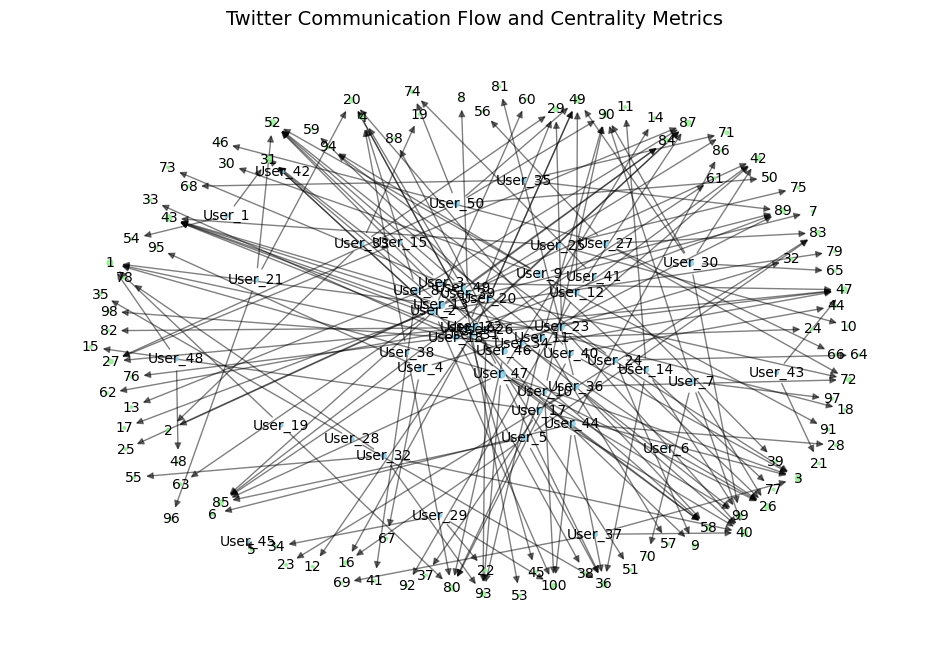

In [6]:

# Create a directed graph
G = nx.DiGraph()

# Add nodes for users
users = set(messages_df["author"]).union(retweets_df["retweeter"])
for user in users:
    G.add_node(user, type="user")  # Explicitly set the type attribute for users

# Add nodes for messages and edges for authorship
for _, message in messages_df.iterrows():
    G.add_node(message["message_id"], type="message")  # Explicitly set the type attribute for messages
    G.add_edge(message["author"], message["message_id"], type="authored")

# Add edges for retweets
for _, retweet in retweets_df.iterrows():
    if G.has_node(retweet["original_message_id"]):  # Ensure message exists in the graph
        G.add_edge(retweet["retweeter"], retweet["original_message_id"], type="retweeted")

# Calculate centrality metrics
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Visualize the graph
plt.figure(figsize=(12, 8))

# Position nodes using spring layout
pos = nx.spring_layout(G, seed=42)

# Draw nodes
node_colors = [
    "skyblue" if G.nodes[node]["type"] == "user" else "lightgreen"
    for node in G.nodes()
]
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    alpha=0.8,
    node_size=[500 * degree_centrality.get(node, 0.1) for node in G.nodes()],
)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5, arrowsize=10)

# Draw labels for users and messages
labels = {node: node for node in G.nodes() if G.nodes[node]["type"] == "user" or isinstance(node, int)}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

# Add title
plt.title("Twitter Communication Flow and Centrality Metrics", fontsize=14)
plt.axis("off")
plt.show()